<a href="https://colab.research.google.com/github/AleCongi/Esame-ICON-/blob/main/ICON_REFACTOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ICON

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive', force_remount=False)

tot=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/eventsFixed.csv')

tot.head(10)

Mounted at /content/drive


,id,fun,food,culture,isOpen,isMusic,text
0,1000187186721956,1,0,1,-1,0,Martedi 05 gennaio super tombolata al Barfly!\...
1,1007051849450711,0,0,0,-1,0,NaN
2,100731190460200,0,0,1,-1,1,"Ingresso free senza obbligo di consumazione,se..."
3,1014507045355357,0,0,0,-1,1,"Giovedi 8 Marzo, Napulitanata ""celebra la donn..."
4,1015563648832823,0,0,1,-1,1,yn e lieta di presentare\n\nNapoolyn x Resilie...
5,1021806692027608,0,0,0,-1,1,Serata live \nVENERDI' 18 MARZO \nUn piacevole...
6,1023358881203820,1,0,0,-1,0,Quest'anno in occasione di san Valentino il ri...
7,1026307021482635,1,0,1,-1,0,Menu adulti 30.00\nMenu bambini 15.00
8,1026761354178792,1,0,1,-1,0,Menu adulti 30.00\nMenu bambini 15.00
9,103006560538403,0,1,1,-1,1,La 1 Esposizione dei disegni di DIPSTER accomp...


In [ ]:
tot.count()

id         7688
fun        7688
food       7688
culture    7688
isOpen     7688
isMusic    7688
text       7170
dtype: int64

È chiaro che ci siano dei testi nulli. È possibile che siano eventi senza descrizione. Me ne accerto:

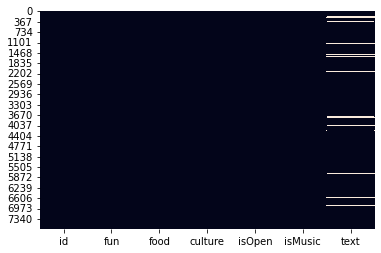

In [ ]:
sb.heatmap(tot.isna(), cbar=False)

##Quickfix

Sapendo che "id" è la nostra colonna primaria, controllo che il numero di valori unici nella colonna primaria sia uguale al numero di righe. Questo mi permette di accertarmi di non avere la stessa riga per più di una volta nel mio dataset.

In [2]:
tot['id'].nunique() == len(tot['id'])

False

In [3]:
for index, row in tot.iterrows():
  
  try:
    trashId = row['id']
    trash = row['text'].lower()
  except AttributeError as ae:
    tot.drop(tot[tot['id'] == trashId].index, inplace=True)

tot = tot.drop_duplicates(subset="id", keep='last')
tot = tot.drop_duplicates(subset="text", keep='last')

In [4]:
tot['id'].nunique() == len(tot['id'])

True

In [5]:
tot.count()

id         6327
fun        6327
food       6327
culture    6327
isOpen     6327
isMusic    6327
text       6327
dtype: int64

droppiamo

In [6]:
tot.drop('isOpen',inplace=True,axis=1)
tot.drop('id',inplace=True,axis=1)
tot

,fun,food,culture,isMusic,text
0,1,0,1,0,Martedi 05 gennaio super tombolata al Barfly!\...
2,0,0,1,1,"Ingresso free senza obbligo di consumazione,se..."
3,0,0,0,1,"Giovedi 8 Marzo, Napulitanata ""celebra la donn..."
4,0,0,1,1,yn e lieta di presentare\n\nNapoolyn x Resilie...
5,0,0,0,1,Serata live \nVENERDI' 18 MARZO \nUn piacevole...
...,...,...,...,...,...
7683,0,0,0,1,Hot Club Roma Trio\n\nMoreno Viglione chitarra...
7684,0,1,0,0,"Presentazione del libro:\n ""Tasmania"" (Einaudi..."
7685,0,1,1,1,In occasione delle GIORNATE EUROPEE DEL PATRIM...
7686,0,0,1,0,Vieni a Danzare gratuitamente per un giorno co...


In [7]:
'''from imblearn.under_sampling import RandomUnderSampler
colonna_bilanciamento = tot["fun"]
classe_da_bilanciare = tot[colonna_bilanciamento == 0]

# Crea un'istanza di RandomUnderSampler
rus = RandomUnderSampler()

# Esegui il re-sampling della colonna
X_resampled, y_resampled = rus.fit_resample(classe_da_bilanciare.values.reshape(-1, 1), classe_da_bilanciare)

# Sostituisci i valori bilanciati nella colonna originale
tot.loc[tot[colonna_bilanciamento == 0].index, "fun"] = X_resampled.ravel()'''

'from imblearn.under_sampling import RandomUnderSampler\ncolonna_bilanciamento = tot["fun"]\nclasse_da_bilanciare = tot[colonna_bilanciamento == 0]\n\n# Crea un\'istanza di RandomUnderSampler\nrus = RandomUnderSampler()\n\n# Esegui il re-sampling della colonna\nX_resampled, y_resampled = rus.fit_resample(classe_da_bilanciare.values.reshape(-1, 1), classe_da_bilanciare)\n\n# Sostituisci i valori bilanciati nella colonna originale\ntot.loc[tot[colonna_bilanciamento == 0].index, "fun"] = X_resampled.ravel()'

##SomePlots

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

Ecco i primi elementi del dataset.

In [9]:
tot.head()

,fun,food,culture,isMusic,text
0,1,0,1,0,Martedi 05 gennaio super tombolata al Barfly!\...
2,0,0,1,1,"Ingresso free senza obbligo di consumazione,se..."
3,0,0,0,1,"Giovedi 8 Marzo, Napulitanata ""celebra la donn..."
4,0,0,1,1,yn e lieta di presentare\n\nNapoolyn x Resilie...
5,0,0,0,1,Serata live \nVENERDI' 18 MARZO \nUn piacevole...


In [10]:
tot.dtypes

fun         int64
food        int64
culture     int64
isMusic     int64
text       object
dtype: object

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


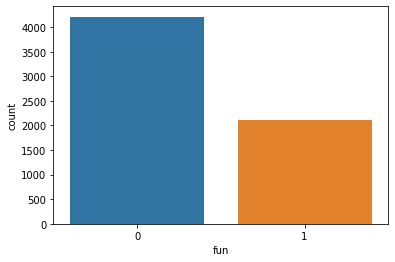

In [11]:
sns.countplot(tot['fun'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


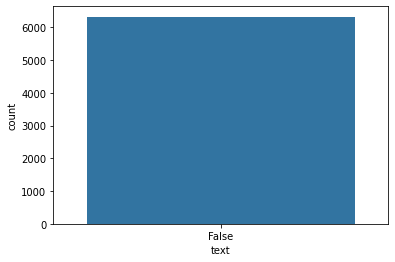

In [12]:
sns.countplot((tot["text"] == None))

##Classificatori

In [ ]:
corpus = tot["text"]

###Tokenizzazione, trasformazione in sequenza e padding

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_NB_WORDS = 30000

# get the raw text data

# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, char_level=False)
tokenizer.fit_on_texts(corpus)

sequences = tokenizer.texts_to_sequences(corpus)
#sequences_test = tokenizer.texts_to_sequences(texts_test)
seq_lens = [len(s) for s in sequences]


In [ ]:
sampleIndex = 1998
print('Sequenza parola numero %s: ' % sampleIndex)
for x in sequences[sampleIndex]:
  print('%d,' % x, end =' ')

Sequenza parola numero 1998: 
2238, 555, 13051, 25474, 1501, 2238, 1945, 555, 250, 163, 314, 3, 89, 25475, 1945, 6, 1738, 5, 83, 2627, 2, 1020, 282, 25475, 1945, 1119, 801, 1, 6611, 737, 3021, 3242, 2, 17153, 4, 126, 622, 2238, 19148, 2, 4295, 1808, 6732, 8, 4, 126, 2169, 335, 47, 238, 4466, 24394, 24395, 5804, 1, 1588, 5165, 5, 366, 91, 26, 153, 282, 1, 93, 79, 18, 151, 26, 114, 9012, 208, 321, 139, 172, 9787, 208, 11003, 1158, 1210, 5917, 14583, 18451, 22, 9, 100, 831, 97, 22, 42, 13, 1690, 1, 13, 1535, 19377, 1859, 6, 1801, 1, 165, 97, 25476, 54, 17, 516, 13051, 5743, 9, 2828, 5, 158, 445, 139, 9012, 34, 1218, 5313, 6397, 24396, 

In [ ]:
print('Traduzione della sequenza numero %d in parole: ' % sampleIndex)
index_to_word = dict((i, w) for w, i in tokenizer.word_index.items())
" ".join([index_to_word[i] for i in sequences[sampleIndex]])

Traduzione della sequenza numero 1998 in parole: 


"carbonara day malanghino rilancia col carbonara roll day mercoledi 7 aprile il nostro carbo roll in regalo a ogni ordine di almeno 50 carbo roll pesce bianco e avocado all'interno scampi uova di quaglia la nostra salsa carbonara briciole di guanciale croccante ordina con la nostra app oppure su whatsapp 388 481 5046 delivery e take away a pranzo 12 30 14 50 e cena 19 00 23 30 dove palese san paolo bari citta modugno san girolamo santo spirito giovinazzo bitonto elenco non del tutto completo se non tra i quartieri e i paesi citati scrivici in privato e ti se arriviamo anche da te malanghino l'esperienza del giappone a casa tua bari palese via vittorio veneto 67 newopening"

Text(0.5, 1.0, 'Y documenti con X parole')

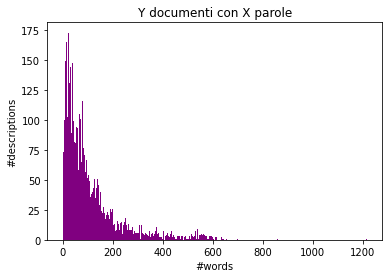

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(seq_lens, bins=500, color = 'purple')
plt.xlabel('#words')
plt.ylabel('#descriptions')
plt.title('Y documenti con X parole')

In [ ]:
media=np.mean(seq_lens)
print("average length: %0.1f" % media)
print("max length: %d" % max(seq_lens))
y = 0
for i in seq_lens:
  if i < media:
    y = y + 1

print("percentuale descrizioni di lunghezza inferiore ad average length: %d%%" % (int(y*100/len(seq_lens))))


average length: 112.2
max length: 1217
percentuale descrizioni di lunghezza inferiore ad average length: 67%


####Padding
La lunghezza media dei testi è di circa 112: eseguo il pad con massima lunghezza 115, valutando che la maggior parte delle descrizioni non supera quel numero di parole.

In [ ]:
MAX_SEQUENCE_LENGTH = 120

# pad sequences with 0s
padded = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH,padding='post')

print('Shape of data tensor:', padded.shape)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Shape of data tensor: (6327, 120)
Found 61492 unique tokens.


In [ ]:
padded[sampleIndex].shape[0]

120

###Test con alcuni classificatori (con supporto di word2vec)

In [ ]:
'''import gensim.downloader as api

# Download the models (1660MB)
word2vec_model300 = api.load('word2vec-google-news-300')'''

"import gensim.downloader as api\n\n# Download the models (1660MB)\nword2vec_model300 = api.load('word2vec-google-news-300')"

In [ ]:
'''
x_emb = []
for sentence in padded:
  print('sentence')
  print(sentence)
  sent_emb = [0 for k in range(300)] 
  
  num_tok = 0
  for tok in sentence:
    if tok != 0:
      word=list(word_index.keys())[list(word_index.values()).index(tok)]
      print('word: '+ word)
      try:
          emb = word2vec_model300.wv[word]
          sent_emb = [x + y for x, y in zip(sent_emb, emb)]
          num_tok = num_tok +1
      except:
          pass
  if num_tok != 0:
    final_sent_emb = [x / num_tok for x in sent_emb]         
  x_emb.append(final_sent_emb)
  

x_emb = np.array(x_emb)
with open('/content/drive/MyDrive/Colab Notebooks/embeddings.npy', 'wb') as f:
    np.save(f, x_emb)
'''
with open('/content/drive/MyDrive/Colab Notebooks/embeddings.npy', 'rb') as f:
    x_emb = np.load(f)
print(type(x_emb))
print(len(x_emb))

<class 'numpy.ndarray'>
6327


In [ ]:
x_emb.shape

(6327, 300)

In [ ]:
print(x_emb[sampleIndex])

[-3.05786133e-02  7.58842699e-02  6.14662170e-02  1.44120419e-01
 -1.97686282e-02  8.10065992e-02 -5.22960316e-03 -4.96363784e-02
 -2.35274344e-03  1.17864435e-01 -9.83539928e-02 -1.38018984e-01
 -1.41777270e-01  2.63907404e-02 -1.08870564e-01  1.45015832e-01
  1.37676239e-01  1.15994540e-01  2.90367820e-02  8.41785778e-02
 -1.09778664e-01 -3.43318130e-02  1.43727389e-01  8.06704434e-02
 -9.10098914e-02 -8.65139094e-02 -1.10806956e-01  9.51815518e-02
 -7.71336411e-02 -2.72553473e-02  1.11357949e-02  7.65165271e-02
  2.58844549e-02 -3.79208651e-02 -9.34795033e-02 -6.82362643e-02
 -6.14663326e-02  4.35656923e-02  9.75188631e-02 -1.69354217e-02
 -2.76641846e-02 -5.28555205e-02  1.05245879e-01  9.82952696e-02
  5.44472897e-03 -1.37826631e-01 -1.16993528e-01 -5.18678607e-02
 -2.40528222e-02  1.39574918e-01 -1.13349683e-01  1.99734775e-01
  9.40972530e-02  5.69162080e-02 -6.25702829e-02  1.85667327e-01
 -1.14800655e-01 -1.09507243e-01  5.17938787e-02 -1.35975231e-01
 -1.49469202e-01  1.08104

In [ ]:
y = tot[['fun', 'food', 'culture', 'isMusic']]

In [ ]:
from sklearn.decomposition import PCA
pca = PCA (170)

reduced = pca.fit_transform(x_emb)

X_reduced,X_testReduced,y_trainReduced,y_testReduced = train_test_split(reduced,y,test_size=0.25,random_state=42)
reduced.shape

(6327, 170)

In [ ]:
from sklearn.utils import class_weight
weights = class_weight.compute_sample_weight(class_weight="balanced", y=y)

In [ ]:
weights

array([0.84899271, 0.66966338, 1.26944883, ..., 0.82064974, 0.42600773,
       0.98964042])

####Split

In [ ]:

X_train,X_test,y_train,y_test = train_test_split(x_emb,y,test_size=0.25,random_state=42)

###Da Multi-label a Multi-classe
A questo punto potremmo pensare di rappresentare il nostro Multi-Label problem come un Multi-Class binary classification problem. È utile costruire questo modello come base di confronto per i prossimi modelli: esso tratterà le label come singoli classification problems. Costruiamo il modello di base.

In [ ]:
!pip install scikit-multilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 KB 8.4 MB/s eta 0:00:00


In [ ]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,CategoricalNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn.metrics import accuracy_score, average_precision_score, f1_score, hamming_loss, label_ranking_average_precision_score, precision_recall_curve, recall_score, classification_report, r2_score

#Multilable
from skmultilearn.problem_transform import BinaryRelevance, LabelPowerset
from skmultilearn.ensemble import RakelD, RakelO, LabelSpacePartitioningClassifier
from skmultilearn.adapt import MLkNN

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
y_test

,fun,food,culture,isMusic
1293,1,1,1,0
7141,0,0,1,1
3846,0,0,1,1
4310,0,1,0,0
5319,0,1,0,0
...,...,...,...,...
3448,0,1,1,0
6162,0,0,0,1
1159,1,0,1,1
6140,1,1,1,1


In [ ]:
# Convert Our Multi-Label Prob to Multi-Class
# binary classficiation
biRel = BinaryRelevance(KNeighborsClassifier())
biRel2 = BinaryRelevance(SVC())
biRelRed = BinaryRelevance(SVC())

'''
BISOGNA PROVARE COMBINAZIONI FRA CLAS E MOD:
CLAS                | MOD
GaussianNB            BinaryRelevance
BernoulliNB           LabelPowerset
CategoricalNB         RakelD
SVC                   RakelO
KNeighborsClassifier  LabelSpacePartitioningClassifier
SGDClassifier         MLkNN
LogisticRegression
'''

biRel.fit(X_train,y_train)
biRel2.fit(X_train,y_train)
biRelRed.fit(X_reduced, y_trainReduced)

BinaryRelevance(classifier=SVC(), require_dense=[True, True])

In [ ]:
# Predictions
prediction = biRel.predict(X_test).toarray()
prediction2 = biRel2.predict(X_test).toarray()
predictionRed = biRelRed.predict(X_testReduced).toarray()

accuracy: 0.30468
loss di hamming: 0.28097
label ranking average precision: 0.72733


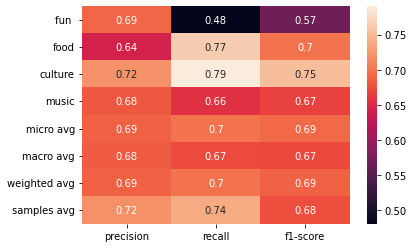

In [ ]:
print('accuracy: %0.5f' % accuracy_score(y_test,prediction))
print('loss di hamming: %0.5f' % hamming_loss(y_test,prediction))
print('label ranking average precision: %0.5f' % label_ranking_average_precision_score(y_test,prediction))
sns.heatmap(pd.DataFrame(classification_report(y_test,prediction, zero_division=1, output_dict=True, target_names=['fun ', 'food', 'culture', 'music'])).iloc[:-1, :].T, annot=True, linecolor='purple')

accuracy: 0.38243
loss di hamming: 0.21429
label ranking average precision: 0.78273


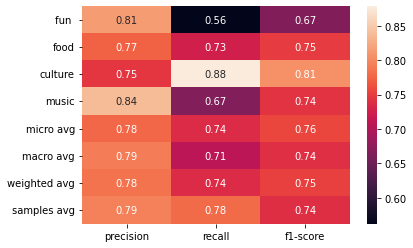

In [ ]:
print('accuracy: %0.5f' % accuracy_score(y_testReduced,predictionRed))
print('loss di hamming: %0.5f' % hamming_loss(y_testReduced,predictionRed))
print('label ranking average precision: %0.5f' % label_ranking_average_precision_score(y_testReduced,predictionRed))
sns.heatmap(pd.DataFrame(classification_report(y_testReduced,predictionRed, zero_division=1, output_dict=True, target_names=['fun ', 'food', 'culture', 'music'])).iloc[:-1, :].T, annot=True, linecolor='purple')

accuracy: 0.37863
loss di hamming: 0.21587
label ranking average precision: 0.77674


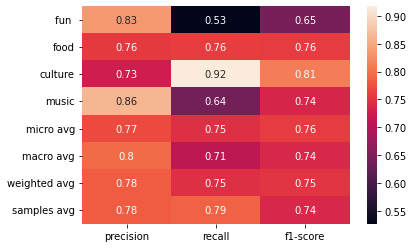

In [ ]:
print('accuracy: %0.5f' % accuracy_score(y_test,prediction2))
print('loss di hamming: %0.5f' % hamming_loss(y_test,prediction2))
print('label ranking average precision: %0.5f' % label_ranking_average_precision_score(y_test,prediction2))
sns.heatmap(pd.DataFrame(classification_report(y_test,prediction2, zero_division=1, output_dict=True, target_names=['fun ', 'food', 'culture', 'music'])).iloc[:-1, :].T, annot=True, linecolor='purple')

Epoch 1/30
149/149 [==============================] - 4s 6ms/step - loss: 0.5948 - accuracy: 0.3210
Epoch 2/30
149/149 [==============================] - 1s 4ms/step - loss: 0.5252 - accuracy: 0.4287
Epoch 3/30
149/149 [==============================] - 1s 6ms/step - loss: 0.4976 - accuracy: 0.4750
Epoch 4/30
149/149 [==============================] - 1s 6ms/step - loss: 0.4823 - accuracy: 0.4953
Epoch 5/30
149/149 [==============================] - 1s 5ms/step - loss: 0.4725 - accuracy: 0.4957
Epoch 6/30
149/149 [==============================] - 1s 6ms/step - loss: 0.4610 - accuracy: 0.5062
Epoch 7/30
149/149 [==============================] - 1s 6ms/step - loss: 0.4557 - accuracy: 0.5113
Epoch 8/30
149/149 [==============================] - 1s 7ms/step - loss: 0.4488 - accuracy: 0.5176
Epoch 9/30
149/149 [==============================] - 1s 7ms/step - loss: 0.4410 - accuracy: 0.5237
Epoch 10/30
149/149 [==============================] - 1s 8ms/step - loss: 0.4401 - accuracy: 0.5241

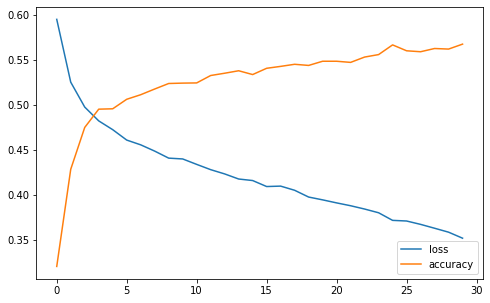

In [ ]:
# mlp for multi-label classification
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot as plt

# get the model
def get_model(n_inputs, n_outputs):
  model = Sequential()
  model.add(Dense(256, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(n_outputs, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
  return model

# evaluate a model using repeated k-fold cross-validation
def evaluate_model(X_train, y_train, X_test, y_test):
  results = list()
  # define evaluation procedure
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  model = get_model(X_train.shape[1], y_train.shape[1])
  # fit model
  fit=model.fit(X_train, y_train, verbose=1, epochs=30)
  # make a prediction on the test set
  yhat = model.predict(X_test)
  # round probabilities to class labels
  pd.DataFrame(fit.history).plot(figsize=(8,5))
  plt.show()
  '''yhat = yhat.round()
  # calculate accuracy
  acc = accuracy_score(y_test, yhat)
  # store result
  print('>%.3f' % acc)
  results.append(acc)
  return results'''

# evaluate model
results = evaluate_model(X_train, y_train, X_test, y_test)
# summarize performance
#print('Accuracy: %.3f (%.3f)' % (mean(results), std(results)))

#####Funzione per costruire il modello

In [ ]:
def build_model(modello,mlb_estimator,xtrain,ytrain,xtest,ytest):
    # Create an Instance
    clf = mlb_estimator(modello)
    clf.fit(xtrain,ytrain)
    # Predict
    clf_predictions = clf.predict(xtest)
    # Check For Accuracy
    acc = accuracy_score(ytest,clf_predictions)
    ham = hamming_loss(ytest,clf_predictions)
    result = {"accuracy:":acc,"hamming_score":ham}
    return result

assegnarli categorie dobbiamo trovare dove la semantica dio un evento che poi puo’derivare da più dati che adesso abbiamo trascurato, in manieraa tale da collocare semantica anche tramite un ontologie esterne il nostro evento in una specie di spazio

questo  ci potrebbe servire per rendere la ricerca di un evento il suo essere consigliato qualcosa di più semantica .


non ci sarà nessun evento in cui ci sarà scritto 'qui si beve alcol' però ci stara degustazione di birra.

potrebbe essere collocare dei termini nello spazio e vedere tramite i dati che noi estraiamo in che posto dello spazio il nostro evento si colloca

Caso d’uso:

mettiamo che tu cerchi :’alcol a bari a quest ora’ .

prendo i 

In [13]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
from nltk.corpus import wordnet as wn

In [15]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [16]:
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
'''
# Funzione per estrarre l'ontologia da una descrizione
def get_ontology(description):
  # Tokenizza la descrizione
  words = nltk.word_tokenize(description)

  # Crea una lista vuota per le lemmi delle parole
  lemmas = []

  # Itera su ogni parola nella descrizione
  for word in words:
    # Ottieni tutti i lemmi per la parola
    lemma = wn.lemmas(word,lang='ita')

    # Aggiungi il lemma alla lista
    lemmas.append(lemma)

  # Restituisci la lista dei lemmi
  return lemmas

# Esempio di utilizzo della funzione get_ontology
description = "oggi ho proprio voglia di gelato"
ontology = get_ontology(description)
print(ontology)

# Integrazione dell'ontologia con il modello di classificazione
def classify_with_ontology(model, description):
  # Estrarre l'ontologia dalla descrizione
  ontology = get_ontology(description)

  # Passare l'ontologia al modello di classificazione
  prediction = model.predict(ontology)

  # Restituire la predizione del modello
  return prediction
'''

[[Lemma('nowadays.r.01.oggi'), Lemma('today.r.02.oggi'), Lemma('today.n.02.oggi'), Lemma('today.n.01.oggi')], [], [Lemma('merely.r.01.proprio'), Lemma('quite.r.02.proprio'), Lemma('very.r.01.proprio'), Lemma('just.r.03.proprio'), Lemma('truly.r.01.proprio'), Lemma('in_truth.r.01.proprio'), Lemma('right.r.03.proprio'), Lemma('actually.r.01.proprio'), Lemma('precisely.r.01.proprio'), Lemma('right.r.01.proprio'), Lemma('very.r.02.proprio'), Lemma('own.s.01.proprio'), Lemma('very.s.01.proprio'), Lemma('identical.s.02.proprio')], [Lemma('birthmark.n.01.voglia'), Lemma('lecherousness.n.01.voglia')], [], [Lemma('cocaine.n.01.cocaina')]]


In [17]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.cluster import AffinityPropagation
'''
def get_wordnet_features(text):
    lemmatizer = WordNetLemmatizer()
    words = nltk.word_tokenize(text)
    features = []
    for word in words:
        synsets = wordnet.synsets(word)
        for synset in synsets:
            features.append(lemmatizer.lemmatize(synset.name().split('.')[0]))
    return features

# Utilizza la funzione get_wordnet_features per estrarre le features dalle descrizioni
'''





"\ndef get_wordnet_features(text):\n    lemmatizer = WordNetLemmatizer()\n    words = nltk.word_tokenize(text)\n    features = []\n    for word in words:\n        synsets = wordnet.synsets(word)\n        for synset in synsets:\n            features.append(lemmatizer.lemmatize(synset.name().split('.')[0]))\n    return features\n\n# Utilizza la funzione get_wordnet_features per estrarre le features dalle descrizioni\n"

In [18]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
stopwordsTotali =stopwords.words('italian') + stopwords.words('english')

In [126]:
from numpy.ma.core import outer
def get_max_depth(synset, depth=0):
    hypernyms = synset.hypernyms()
    if not hypernyms:
        return depth
    return max(get_max_depth(h, depth + 1) for h in hypernyms)

def getHypernyms(stringa):
  lemmatizer = WordNetLemmatizer()
  synset=wn.synsets(stringa,lang='ita',pos=wn.NOUN)
  if(synset == []):
    synset=wn.synsets(stringa,lang='ita',pos=wn.VERB)
    if(synset == []):
      synset=wn.synsets(stringa,lang='ita',pos=wn.ADV)
  dpt=get_max_depth(synset[0])
  rangemax=3
  
  lista=[]
  lista.append(synset[0])
  while(dpt != rangemax):
    if(dpt < rangemax):
      lista.append(lista[len(lista)-1].hypernyms()[0])
      dpt=dpt+1
    else:
      
      dpt=dpt-1
  return lista
    

 


In [127]:
print(getHypernyms('auto'))

[Synset('car.n.01')]


In [ ]:
try:  
      wn.synsets('gara',lang='ita',pos=wn.NOUN)[0]
    except:
      wn.synsets('gelato',lang='ita',pos=wn.VERB)[0]

In [120]:

def get_syns(description):
  test=[]
  words = nltk.word_tokenize(description)
  for every in words:
    if (every not in stopwordsTotali):
      if(wn.synsets(every, lang ='ita') == []):
        
          test.append(wn.synsets(every))
      else:
        
          test.append(wn.synsets(every, lang ='ita'))

  lemmatizer = WordNetLemmatizer()
  ciao =[]
  for each in range(len(test)):
    for q in range(len(test[each])):
      ciao.append(lemmatizer.lemmatize(test[each][q].name().split('.')[0]))

  ciao=list(set(ciao))
  return ciao


In [25]:
import sys

In [121]:

X1 = []
newText=tot['text'].tolist()

for description in newText:
    
    feature =[]
    print(description)
    features = get_syns(str(description))
    print(features)
    words = ''
    for each in features:
      words = words + ' ' + each
    X1.append(words)
    

Streaming output truncated to the last 5000 lines.

 CHIAMA E PRENOTATI / RISCHIO SOLDOUT
3407315632 ( Whastupp )

#Bailando #Zumba #Bruciando #Fitness #Portuense #Merengue #Bachata #Zumba #LatinZumba
['pitching', 'hazard', 'sauce', 'part', 'moment', 'einsteinium', 'ti', 'set', 'unconditional', 'east', 'complete', 'veranda', 'one', 'room', 'suit', 'wait', 'victimize', 'insecurity', 'away', 'partially', 'heart', 'weight', 'promotion', 'manual', 'examination', 'anticipation', 'introduction', 'full', 'collision', 'attempt', 'bosom', 'party', 'aluminum', 'risk', 'leak', 'hall', 'choice', 'loggia', 'never', 'lupus_erythematosus', 'capital', 'bid', 'prime', 'corsican', 'whole', 'in', 'flower', 'indium', 'side', 'no', 'convict', 'miss', 'score', 'inch', 'wobble', 'i', 'illinois', 'evidence', 'ensemble', 'forty-nine', 'road', 'starting_signal', 'freemasonry', 'lose', 'entire', 'murder', 'not', 'supply', 'speed_of_light', 'trial', 'barely', 'alabama', 'memorize', 'delay', 'rehearsal', 'timing',

In [32]:
tot['text'][0]

'Martedi 05 gennaio super tombolata al Barfly!\nTante calze da vincere!!!\nFormula 10 euro panino patatine e bibita e la cartella la offriamo noi!\nConsigliata la prenotazione\n081660023'

In [33]:
X1[0]

' ace booking surpass overcome security bun extremely file folder rule recipe win french_fries get_the_better_of january ten bail super prevail soft_drink chip satchel portfolio euro acquire beat formula briefcase superintendent'

In [35]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [36]:
vectorizer = CountVectorizer()
vector = vectorizer.fit_transform(X1)

In [37]:
vectorizerTfIdf=TfidfVectorizer()
vectorTfIdf=vectorizerTfIdf.fit_transform(X1)

In [39]:
from sklearn.model_selection import train_test_split
X_train1, X_test1 = train_test_split(vectorTfIdf, test_size=0.2, random_state=42) 

In [44]:
from sklearn.cluster import KMeans

number_of_clusters=10
km = KMeans(n_clusters=number_of_clusters)
# Normally people fit the matrix
km.fit(X_train1)
# But you could fit the idf_df instea
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizerTfIdf.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: together simultaneously jointly ensemble whole
Cluster 1: starting_signal off street road away
Cluster 2: dislodge complimentary absolve exempt rid
Cluster 3: construct cook produce do create
Cluster 4: nine forty illinois one world
Cluster 5: divertimento amusement diversion entertainment pastime
Cluster 6: ampere deoxyadenosine_monophosphate angstrom vitamin_a adenine
Cluster 7: six music twenty one band
Cluster 8: embody equal belong_to being stand
Cluster 9: momentous adult important_person large distinguished


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
apModel = AffinityPropagation()
# Addestra il modello sulla nuova rappresentazione delle descrizioni
res11=apModel.fit(X_train1)


In [ ]:
from sklearn import metrics
cluster_centers_indices = res11.cluster_centers_indices_
labels = res11.labels_
n_clusters_ = len(cluster_centers_indices)

In [ ]:
print("Estimated number of clusters: %d" % n_clusters_)

Estimated number of clusters: 0


In [ ]:

print("Homogeneity: %0.3f" % metrics.homogeneity_score(X_test1.toarray(), labels))
print("Completeness: %0.3f" % metrics.completeness_score(X_test1, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(X_test1, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(X_test1, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(X_test1, labels)
)
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X, labels, metric="sqeuclidean")
)

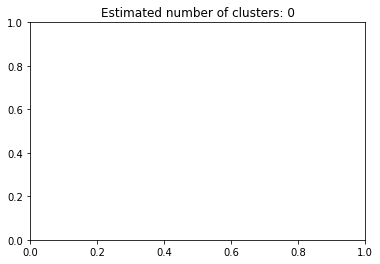

In [ ]:
plt.figure(1)
plt.clf()

colors = plt.cycler("color", plt.cm.viridis(np.linspace(0, 1, 4)))

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train1[cluster_centers_indices[k]]
    plt.scatter(
        X_train1[class_members, 0], X_train1[class_members, 1], color=col["color"], marker="."
    )
    plt.scatter(
        cluster_center[0], cluster_center[1], s=14, color=col["color"], marker="o"
    )
    for x in X_train1[class_members]:
        plt.plot(
            [cluster_center[0], x[0]], [cluster_center[1], x[1]], color=col["color"]
        )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [ ]:
predictionRes11 = res11.predict(X_test1)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_affinity_propagation.py:528: ConvergenceWarning: This model does not have any cluster centers because affinity propagation did not converge. Labeling every sample as '-1'.
  warnings.warn(


In [ ]:
plt.close("all")
plt.figure(1)
plt.clf()

colors = plt.cycler("color", plt.cm.viridis(np.linspace(0, 1, 4)))

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.scatter(
        X[class_members, 0], X[class_members, 1], color=col["color"], marker="."
    )
    plt.scatter(
        cluster_center[0], cluster_center[1], s=14, color=col["color"], marker="o"
    )
    for x in X[class_members]:
        plt.plot(
            [cluster_center[0], x[0]], [cluster_center[1], x[1]], color=col["color"]
        )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [ ]:
from wordcloud import WordCloud

In [ ]:
with open('drive/MyDrive/Colab Notebooks/stopwordsita.txt') as file:
  content=file.read()
lines=content.split('\n')
swSet=set(lines)


In [ ]:
labels=apModel.labels_
cluster_labels = np.unique(labels)
cluster_sizes = [(labels == c).sum() for c in cluster_labels]
sizes_idx = np.argsort(cluster_sizes)[::-1][:5]

# Plot dei risultati
for i, c in enumerate(cluster_labels[sizes_idx]):
    mask = (labels == c)
    descrizioni_c = np.array(tot['text'])[mask]
    text = " ".join(descrizioni_c)
    
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = swSet, 
                min_font_size = 10).generate(text)

    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0)

# Stampa dei 5 termini più comuni dei 5 cluster più grandi
for i, c in enumerate(cluster_labels[sizes_idx]):
    mask = (labels == c)
    descrizioni_c = np.array(tot['text'])[mask]
    text = " ".join(descrizioni_c)
    words = nltk.word_tokenize(text)
    fdist = nltk.FreqDist(words)

In [ ]:
def search_events(query, model, lemmatizer):
    features = get_wordnet_features(query)
    query_vectors = []
    for feature in features:
        feature = lemmatizer.lemmatize(feature)
        if feature in model.vocabulary_:
            query_vectors.append(model.transform([feature]).toarray()[0])
    query_vector = np.mean(query_vectors, axis=0)
    events = model.predict(query_vector.reshape(1, -1))
    return events

lemmatizer = WordNetLemmatizer()
events = search_events("alcool", biRel2, lemmatizer)